In [ ]:
library(MASS)
load("classdata.RData")

: 

Let's first take a look at the time series.The series are annual production in millions of net tons of bitumous coal between 1920 and 1968.The annual data may suggest no seasonal effect. Then
we take a look at the scatterplot of the time series. After applying some log or square root transformation, we may see almost the same pattern. Besides,after adding a scatterplot lowess to each graphics, we may see little linear trend from the 3 graphics below.It seems that the data shows a periodic effect.However, the period seems to be so long which might be around 30 years and it was really flat compared to the raw data.So we may view it as no trend is shown in this data.

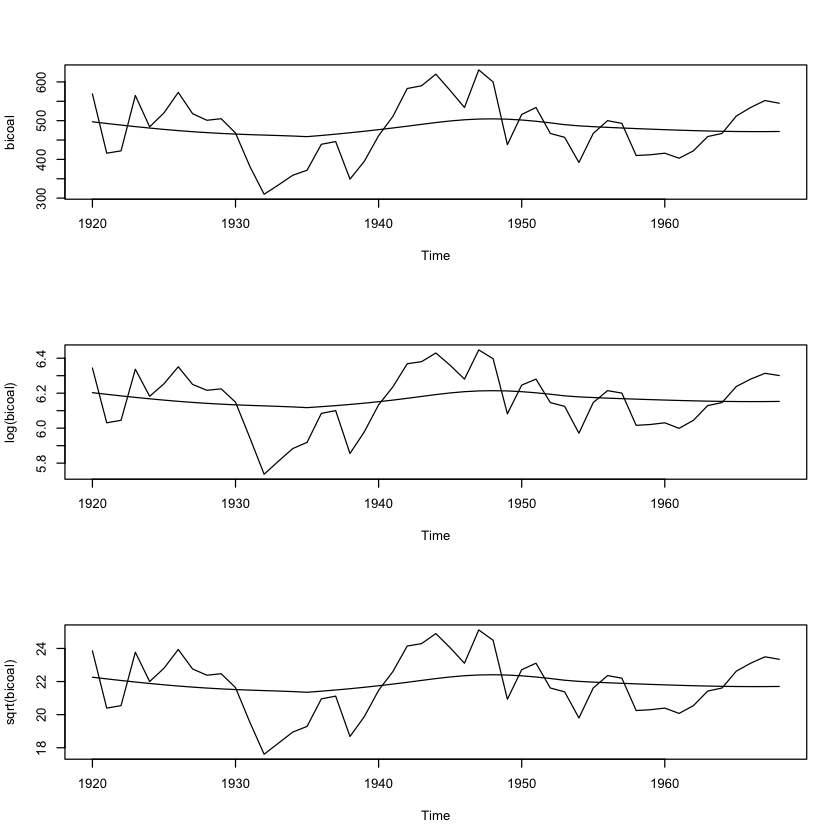

In [64]:
# ts(bicoal.tons)
bicoal<-bicoal.tons
pw1<-list(bg="white",mfrow=c(1,1))
pw3<- list(bg = "white",mfrow=c(3,1))
pw2<- list(bg = "white",mfrow=c(2,1))
par(pw3)
# summary(bicoal)
plot(bicoal)
lines(lowess(bicoal),type='l')
plot(log(bicoal))
lines(lowess(log(bicoal)),type='l')
plot(sqrt(bicoal))
lines(lowess(sqrt(bicoal)),type='l')

We may also want to know if the data show some dependence between each other and apply an ARMA model to the time series.Firstly,we need to check the acf and pacf of the data.From the plot below ,it strongly suggest the process are not stationary .Then we may consider applying a differenceing on the data to get stationary process.

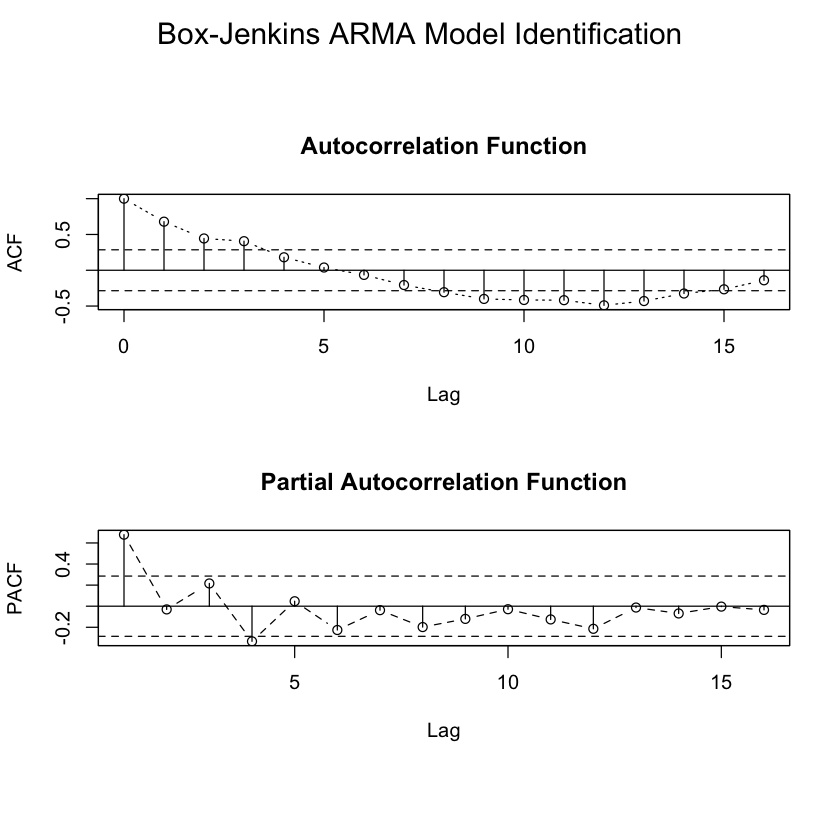

In [65]:
par(pw1)
Ident(bicoal)


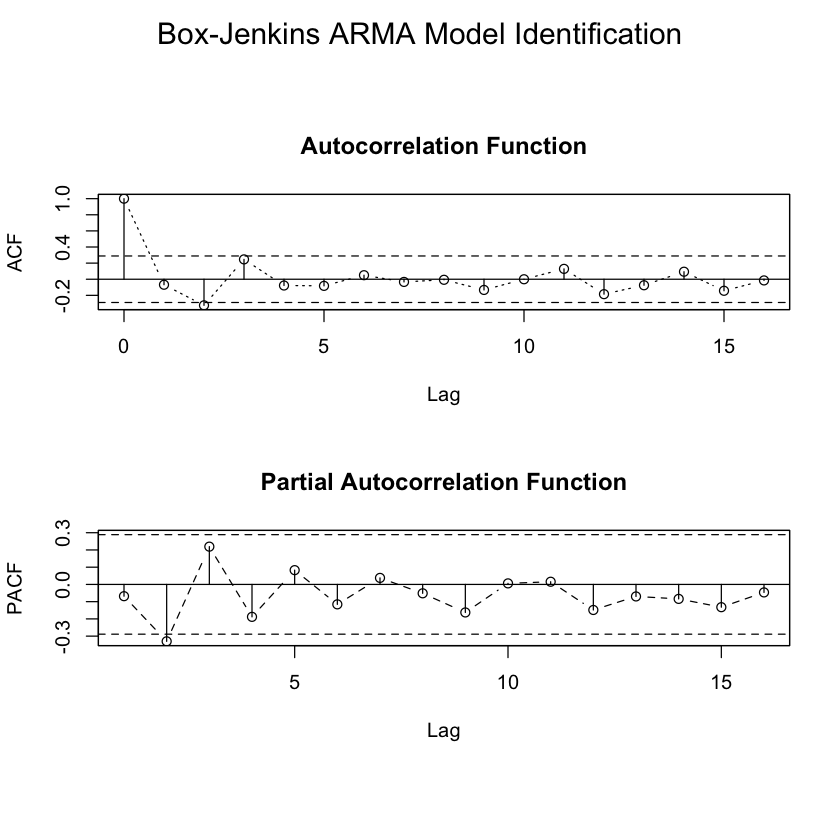

In [66]:
par(pw1)
# plot(diff(bicoal))
Ident(diff(bicoal))

After differencing the data, we do see  that acf and pacf shows a stationary process and also suggest us apply an AR(2) model to the differencing data on the above plot.
Considering an AR(2) model ,from all the plot below  the residuals of the model shows the model perform well.The residuals seems to have not relaltionship with the value of annual procution and performs like a norm distrubution despite a large spread.
So the final model may be considered as $\Delta X_{t+1}=-0.14\Delta X_{t}-0.30\Delta X_{t-1}+\epsilon_t$ which can also be written as $ X_{t+2}=0.72X_{t+1}-0.16X_{t}+0.30X_{t-1}+\epsilon_t$

[1] -0.1362195 -0.2965358

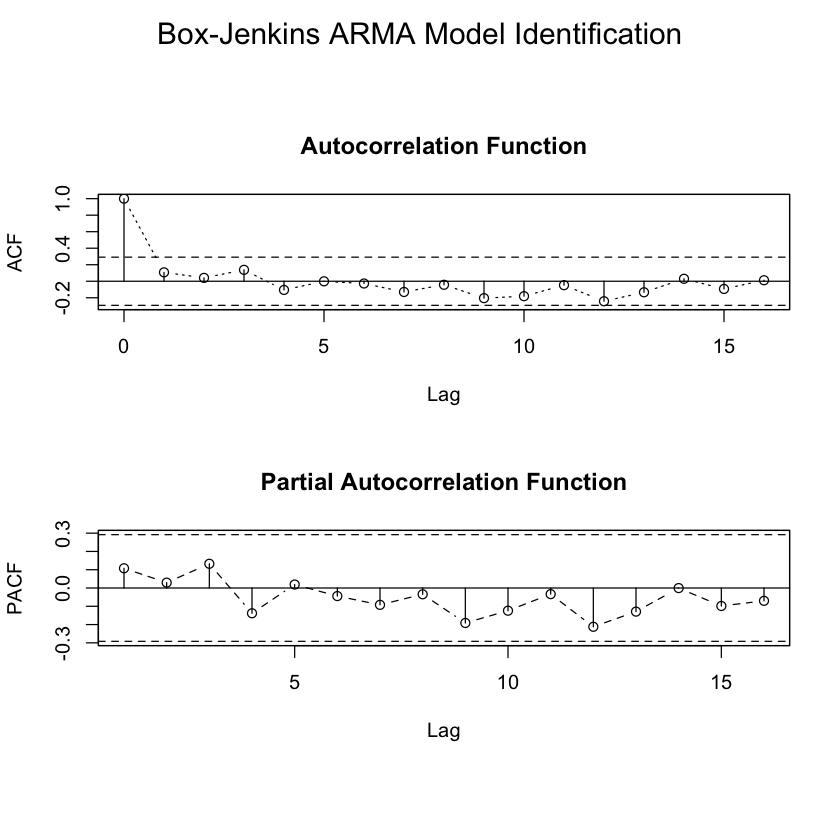

In [67]:
par(pw1)
fin3<-Raic(diff(bicoal))
fin3$coef[1:2,2]
Ident(fin3$resid[,2])

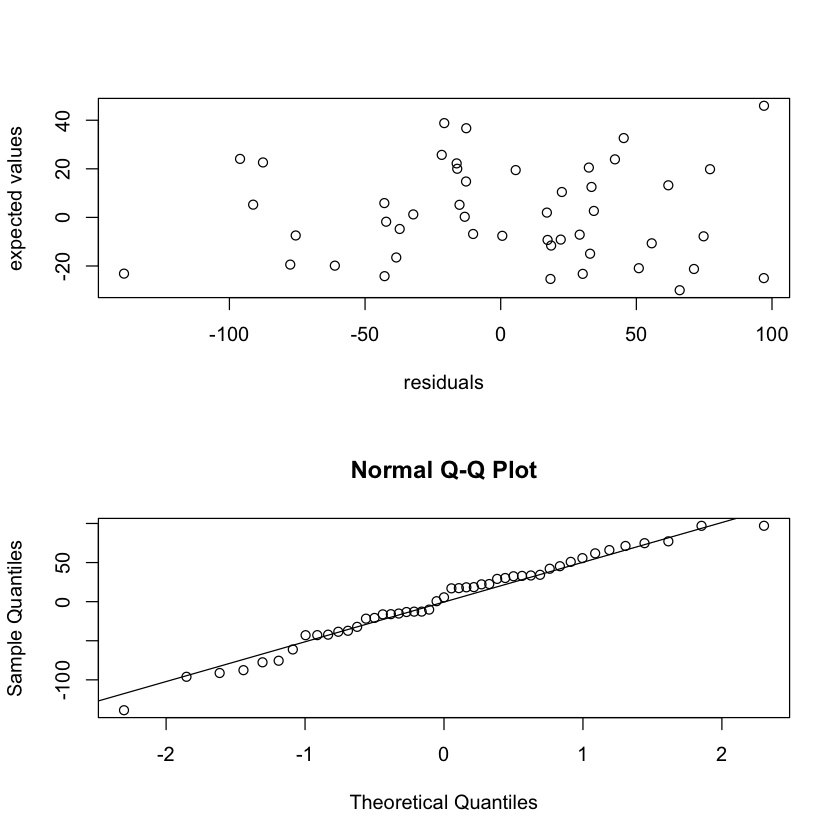

In [68]:
par(pw2)
plot(fin3$resid[,2],diff(bicoal)[-1]-fin3$resid[,2],xlab='residuals',ylab='expected values')
qqnorm(fin3$resid[,2])
qqline(fin3$resid[,2])